<a href="https://colab.research.google.com/github/shikhar2402/Bipolar-Factory-/blob/master/Crawl__News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 24 15:08:16 2020

@author: SHIKHAR SAXENA
"""


'\nCreated on Fri Apr 24 15:08:16 2020\n\n@author: SHIKHAR SAXENA\n'

**LETS START WITH SCRAPPING THE NEWS WITH DIFFERENT NEWS WEBSITES**

Starting with timesofindia news artices, Here the code scrap the news using beautiful soup

In [0]:
import requests
from bs4 import BeautifulSoup

result = requests.get("https://timesofindia.indiatimes.com/viral-news/")
src = result.content
soup = BeautifulSoup(src, 'lxml')
links=soup.findAll('a')
urls = []
for link in links:
    title = link.get('title')
    if title!= None :
        urls.append(title)    

Scrapping news from NDTV articles

In [0]:

result = requests.get("https://www.ndtv.com/topic/viral")

src = result.content

soup = BeautifulSoup(src, 'lxml')
links=soup.findAll('strong')
for h2_tag in links:
    if h2_tag.text!=None :
        urls.append(h2_tag.text)
    
    

Scrapping news from livemint articles

In [0]:

result = requests.get("https://www.livemint.com/mostpopular")

src = result.content


soup = BeautifulSoup(src, 'lxml')
links=soup.findAll('h2', {'class':"headline"})

for h2_tag in links:
    urls.append(h2_tag.text)
    

Removing the duplicate elements from the lists

In [0]:

mylist = list(dict.fromkeys(urls))


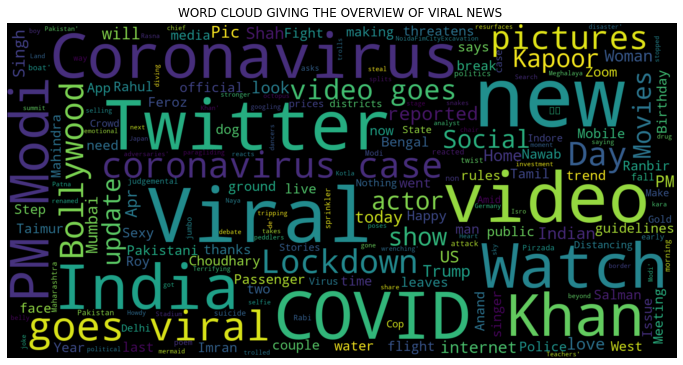

In [195]:

neg_string = []
for t in mylist:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')


from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WORD CLOUD GIVING THE OVERVIEW OF VIRAL NEWS ")
plt.show()


In [0]:

res=mylist
length=[]
for i in (res):
    length.append(len(i))
sum=0
for i in length:
    sum+=i

avg=sum/len(res)

viral=[]
for i in res:
    if(len(i)<(avg)):
        viral.append(0)
    else:
        viral.append(1)
    

Creating the data frame 

In [0]:
import pandas as pd  

data_frame=pd.DataFrame({"NEWS" : res,"VIRAL" : viral})


In [198]:
data_frame.head()

,NEWS,VIRAL
0,'We are not in the same boat': In coronavirus ...,1
1,This jumbo has a way with water sprinkler,0
2,How Twitter reacted to early morning twist in ...,1
3,Watch: Pakistan singer Rabi Pirzada threatens ...,1
4,Viral News: Twitter trend #NoidaFimCityExcavat...,1


In [0]:
#Shuffling the data properly for reducing overfitting#

from sklearn.utils import shuffle
data_frame = shuffle(data_frame)



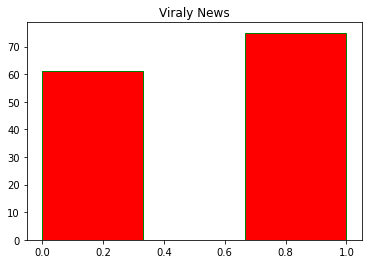

Non Viral News 61
Viral News 75


In [200]:

import matplotlib.pyplot as plt
plt.hist(data_frame['VIRAL'],facecolor='red',edgecolor='green',bins=3)
plt.title("Viraly News")
plt.show()

print("Non Viral News" , (data_frame['VIRAL']==0).sum())

print("Viral News" ,(data_frame['VIRAL']==1).sum())

As from the Histogram plot we can see the data is balanced i.e. the viral and non-viral content is almost equal. 

In [201]:

import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Removing the Stopwords

In [0]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

data_frame['NEWS'] = data_frame['NEWS'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [203]:
data_frame['NEWS'].head(10)

3      Watch: Pakistan singer Rabi Pirzada threatens ...
130    Aadhaar card updation done Common Service Centres
115    Watch: Prannoy Roy, Raghuram Rajan On Economy ...
95     US Official Resigns After Drinking Beer, Throw...
133    23 new coronavirus cases reported Jammu Kashmi...
131    52 new coronavirus cases reported Tamil Nadu 8...
40                  Shibani Dandekar's sizzling pictures
114    Friday Prayer Crowd Dispersed By Police In Wes...
96     Viral: A Petition To #UninstallWhatsApp For Am...
135    Half new cases Mumbai, Ahmedabad, New Delhi, I...
Name: NEWS, dtype: object

In [0]:


from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(data_frame["NEWS"])
x=x.toarray()





In [0]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
x,data_frame['VIRAL'], test_size=0.33, random_state=42)


In [0]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix 
  
classifier = GaussianNB(); 
classifier.fit(X_train, y_train) 

y_pred=classifier.predict(X_test)



In [207]:

from sklearn.metrics import accuracy_score
print("Accuracy Score = ")
accuracy_score(y_test,y_pred )


Accuracy Score = 


0.8444444444444444

**So our model has come this way and giving us an accuracy of approx 80%. 
We can use deep neural network to achieve a better score but our data is less so machine learning model would give us the best score. 
That's why GaussianNB or multinomialNB would works better on this dataset rather than DNN**

In [208]:

from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX ", confusion_matrix(y_test, y_pred))



CONFUSION MATRIX  [[18  6]
 [ 1 20]]


In [0]:

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()


In [210]:
print("True Positive ", tp)

True Positive  20


In [211]:
print("True Negative ", tn)

True Negative  18
